In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

In [3]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 10
        outputLayerNeurons = 1

        self.learning_rate = 0.2
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outputLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        self.hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(self.hidden_input)

        self.output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.sigmoid(self.output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)

        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

In [4]:
# Create three separate neural networks
NN1 = NeuralNetwork()
NN2 = NeuralNetwork()
NN3 = NeuralNetwork()

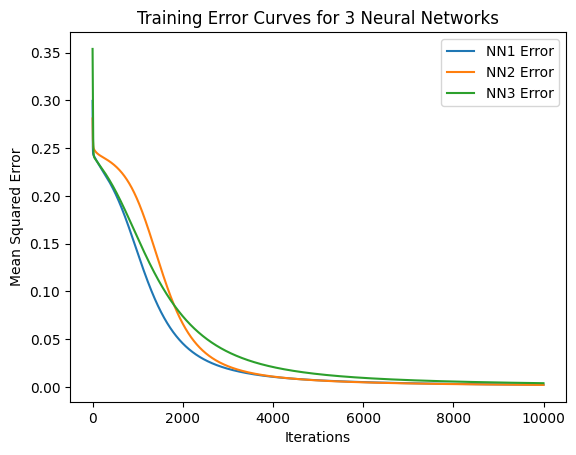

In [5]:
# Track errors separately
err1 = []
err2 = []
err3 = []

for i in range(10000):
    NN1.train(X, Y)
    NN2.train(X, Y)
    NN3.train(X, Y)

    err1.append(np.mean(np.square(Y - NN1.feedForward(X))))
    err2.append(np.mean(np.square(Y - NN2.feedForward(X))))
    err3.append(np.mean(np.square(Y - NN3.feedForward(X))))

# Plot errors
plt.plot(err1, label='NN1 Error')
plt.plot(err2, label='NN2 Error')
plt.plot(err3, label='NN3 Error')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training Error Curves for 3 Neural Networks')
plt.legend()
plt.show()

In [6]:
print("NN1 Predictions:")
print(NN1.feedForward([0, 0]))
print(NN1.feedForward([1, 1]))
print(NN1.feedForward([1, 0]))
print(NN1.feedForward([0, 1]))

print("\nNN2 Predictions:")
print(NN2.feedForward([0, 0]))
print(NN2.feedForward([1, 1]))
print(NN2.feedForward([1, 0]))
print(NN2.feedForward([0, 1]))

print("\nNN3 Predictions:")
print(NN3.feedForward([0, 0]))
print(NN3.feedForward([1, 1]))
print(NN3.feedForward([1, 0]))
print(NN3.feedForward([0, 1]))

NN1 Predictions:
[0.05285688]
[0.04283578]
[0.95335457]
[0.95587195]

NN2 Predictions:
[0.04072985]
[0.04856581]
[0.95585799]
[0.95312354]

NN3 Predictions:
[0.05908607]
[0.06371845]
[0.93712697]
[0.93775026]
